# DMV Practical No.2
                      
                      

# Interacting with Web APIs
Problem Statement: Analyzing Weather Data from OpenWeatherMap API
Dataset: Weather data retrieved from OpenWeatherMap API
Description: The goal is to interact with the OpenWeatherMap API to retrieve weather data
for a specific location and perform data modeling and visualization to analyze weather
patterns over time.
Tasks to Perform:
1. Register and obtain API key from OpenWeatherMap.
2. Interact with the OpenWeatherMap API using the API key to retrieve weather data for
a specific location.
3. Extract relevant weather attributes such as temperature, humidity, wind speed, and
precipitation from the API response.
4. Clean and preprocess the retrieved data, handling missing values or inconsistent
formats.
5. Perform data modeling to analyze weather patterns, such as calculating average
temperature, maximum/minimum values, or trends over time.
6. Visualize the weather data using appropriate plots, such as line charts, bar plots, or
scatter plots, to represent temperature changes, precipitation levels, or wind speed
variations.
7. Apply data aggregation techniques to summarize weather statistics by specific time
periods (e.g., daily, monthly, seasonal).
8. Incorporate geographical information, if available, to create maps or geospatial
visualizations representing weather patterns across different locations.
9. Explore and visualize relationships between weather attributes, such as temperature
and humidity, using correlation plots or heatmaps.

In [23]:
import requests#used to retrive the live data from the API
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime#Used to work with dates and times in Python
#In this program we use it to convert timestamps from the API (like "2025-11-08 15:00:00") into proper Python date-tim

In [24]:
import requests
import json#When you use an API (like weather data), the information you get back is in JSON format, which looks like the below output
#So to make Python understand this data properly, you need the json module.
API_KEY = "e6d216bdd30fc098485b192c3e990f6a"   # This is my API key Replace with your OpenWeatherMap API key
CITY = "Nashik"#The city you want to retrive the weather data of
URL = f"https://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric"#Dont replace CITY or API_KEY here keep this line as it is
#You are sending a request to the API link (URL) — in your case, the OpenWeatherMap API.
#Python waits for the website (API server) to send data back.
#This contacts the OpenWeatherMap server and stores the result inside the variable response
response = requests.get(URL)
data = response.json()#The API’s reply comes in JSON format (which looks like a dictionary or nested text data).
#.json() converts that raw text into a Python dictionary, which is easy to work with.
data

#To geneate the API key Create Account on Open Weather Website and then click on your Profile and select 
#My API keys and then generate a API key you can keep the name of  API key anything as you wish
#After generating the API Key paste the API key correctly ensure they is no spacing between quotes
#Then wait for 15-20 minutes as API key takes time to get activate though on website it will show as Acitve

{'cod': '200',
 'message': 0,
 'cnt': 40,
 'list': [{'dt': 1762970400,
   'main': {'temp': 16.99,
    'feels_like': 15.87,
    'temp_min': 16.99,
    'temp_max': 16.99,
    'pressure': 1017,
    'sea_level': 1017,
    'grnd_level': 943,
    'humidity': 43,
    'temp_kf': 0},
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01n'}],
   'clouds': {'all': 0},
   'wind': {'speed': 1.95, 'deg': 94, 'gust': 1.93},
   'visibility': 10000,
   'pop': 0,
   'sys': {'pod': 'n'},
   'dt_txt': '2025-11-12 18:00:00'},
  {'dt': 1762981200,
   'main': {'temp': 16.65,
    'feels_like': 15.52,
    'temp_min': 15.97,
    'temp_max': 16.65,
    'pressure': 1017,
    'sea_level': 1017,
    'grnd_level': 942,
    'humidity': 44,
    'temp_kf': 0.68},
   'weather': [{'id': 800,
     'main': 'Clear',
     'description': 'clear sky',
     'icon': '01n'}],
   'clouds': {'all': 0},
   'wind': {'speed': 1.72, 'deg': 75, 'gust': 1.73},
   'visibility': 10000,
   'pop':

In [25]:
weather_list = data["list"]
#The OpenWeatherMap forecast JSON contains a key called "list",
#which stores a list of all the weather reports (every 3 hours for 5 days).
#This line extracts that part and stores it in weather_list.
weather_data = []#This creates an empty list to store all the useful information (temperature, humidity, etc.)
#that you’ll extract from the API data.
for item in weather_list:#Loops through each weather record (each item) inside the big list of forecasts.
    dt = datetime.fromtimestamp(item["dt"])#Converts the timestamp (item["dt"]) into a readable date and time.
    temp = item["main"]["temp"]#Extracts current temperature in °C.
    temp_min = item["main"]["temp_min"]#Extracts minimum temperature.
    temp_max = item["main"]["temp_max"]#Extracts maximum temperature.
    humidity = item["main"]["humidity"]#Extracts humidity.
    wind_speed = item["wind"]["speed"]#Extracts windspeed
    description = item["weather"][0]["description"]#Extracts short weather description (like “clear sky”, “light rain”, etc.).

    weather_data.append([dt, temp, temp_min, temp_max, humidity, wind_speed, description])#Adds all extracted info in the list

In [26]:
df = pd.DataFrame(weather_data, columns=["DateTime", "Temp", "Temp_Min", "Temp_Max", "Humidity", "Wind_Speed", "Description"])
df#Converted the Extracted info into proper Dataset

,DateTime,Temp,Temp_Min,Temp_Max,Humidity,Wind_Speed,Description
0,2025-11-12 23:30:00,16.99,16.99,16.99,43,1.95,clear sky
1,2025-11-13 02:30:00,16.65,15.97,16.65,44,1.72,clear sky
2,2025-11-13 05:30:00,15.72,15.08,15.72,47,2.03,clear sky
3,2025-11-13 08:30:00,18.48,18.48,18.48,48,2.69,clear sky
4,2025-11-13 11:30:00,24.34,24.34,24.34,34,4.34,clear sky
5,2025-11-13 14:30:00,26.43,26.43,26.43,27,3.11,clear sky
6,2025-11-13 17:30:00,22.98,22.98,22.98,37,1.84,clear sky
7,2025-11-13 20:30:00,18.87,18.87,18.87,41,1.95,clear sky
8,2025-11-13 23:30:00,17.27,17.27,17.27,49,1.89,clear sky
9,2025-11-14 02:30:00,16.37,16.37,16.37,56,2.30,clear sky


In [27]:
df.info()#Gives info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DateTime     40 non-null     datetime64[ns]
 1   Temp         40 non-null     float64       
 2   Temp_Min     40 non-null     float64       
 3   Temp_Max     40 non-null     float64       
 4   Humidity     40 non-null     int64         
 5   Wind_Speed   40 non-null     float64       
 6   Description  40 non-null     object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 2.3+ KB


In [28]:
df.isnull().sum()#It tells the number of null values if any in the dataset

DateTime       0
Temp           0
Temp_Min       0
Temp_Max       0
Humidity       0
Wind_Speed     0
Description    0
dtype: int64

In [29]:
df.shape#It showas the number of rows and columns in the dataset
#Here are 40 rows and 7 columns

(40, 7)

In [30]:
df = df.drop_duplicates()#Droping duplicate records if any 

In [31]:
df

,DateTime,Temp,Temp_Min,Temp_Max,Humidity,Wind_Speed,Description
0,2025-11-12 23:30:00,16.99,16.99,16.99,43,1.95,clear sky
1,2025-11-13 02:30:00,16.65,15.97,16.65,44,1.72,clear sky
2,2025-11-13 05:30:00,15.72,15.08,15.72,47,2.03,clear sky
3,2025-11-13 08:30:00,18.48,18.48,18.48,48,2.69,clear sky
4,2025-11-13 11:30:00,24.34,24.34,24.34,34,4.34,clear sky
5,2025-11-13 14:30:00,26.43,26.43,26.43,27,3.11,clear sky
6,2025-11-13 17:30:00,22.98,22.98,22.98,37,1.84,clear sky
7,2025-11-13 20:30:00,18.87,18.87,18.87,41,1.95,clear sky
8,2025-11-13 23:30:00,17.27,17.27,17.27,49,1.89,clear sky
9,2025-11-14 02:30:00,16.37,16.37,16.37,56,2.30,clear sky


In [32]:
df.shape

(40, 7)

In [33]:
print("Humidity Range:", df["Humidity"].min(), "to", df["Humidity"].max())#Printing max and minimum Humidity values

Humidity Range: 27 to 64


In [34]:
print("Temperature Range:", df["Temp"].min(), "to", df["Temp"].max())#Printing max and minimum Temperature values

Temperature Range: 15.03 to 26.51


In [35]:
df.describe()#It gives statistical information of the numeric columns

,DateTime,Temp,Temp_Min,Temp_Max,Humidity,Wind_Speed
count,40,40.000000,40.000000,40.000000,40.000000,40.000000
mean,2025-11-15 10:00:00,20.179000,20.146000,20.179000,45.575000,2.659750
min,2025-11-12 23:30:00,15.030000,15.030000,15.030000,27.000000,1.480000
25%,2025-11-14 04:45:00,16.905000,16.875000,16.905000,39.750000,1.950000
50%,2025-11-15 10:00:00,18.705000,18.705000,18.705000,44.500000,2.245000
75%,2025-11-16 15:15:00,23.462500,23.462500,23.462500,53.250000,3.005000
max,2025-11-17 20:30:00,26.510000,26.510000,26.510000,64.000000,5.530000
std,NaN,3.824944,3.862752,3.824944,9.567272,1.042601


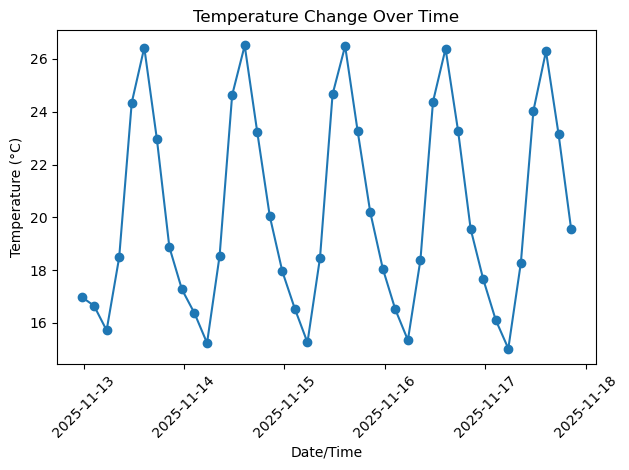

In [36]:
#Plotting line plot
plt.plot(df["DateTime"], df["Temp"], marker='o')#marker='o' → draws small circles at each data point to make them visible
plt.title("Temperature Change Over Time")
plt.xlabel("Date/Time"); plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)#The time labels on the X-axis can overlap, so this rotates them 45° for better readability.
plt.tight_layout()#Automatically adjusts the chart’s layout so nothing (like labels or titles) gets cut off
plt.show()
#The temperature rises during the day and drops at night — that’s why you see repeated up-and-down waves each day.
#Peaks → daytime (warmer)
#Valleys → nighttime (cooler)

#You can also notice that:
#The maximum temperature each day is around 26–27°C.
#The minimum temperature each night is around 15–16°C.
#This shows a clear daily cycle of heating and cooling — typical of real weather data.

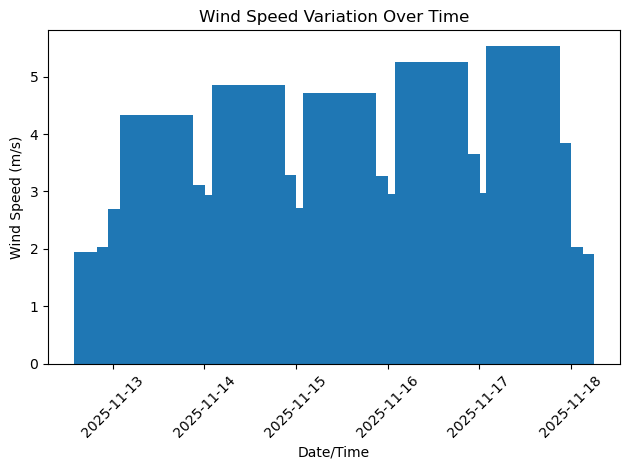

In [37]:
#Plotting bar plot
plt.bar(df["DateTime"], df["Wind_Speed"])
plt.title("Wind Speed Variation Over Time")
plt.xlabel("Date/Time"); plt.ylabel("Wind Speed (m/s)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


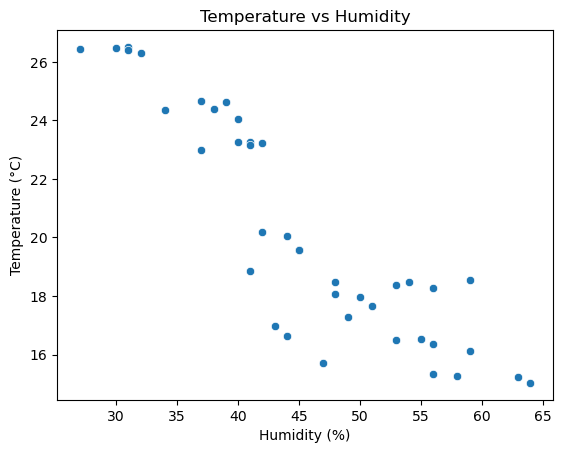

In [38]:
#Plotting scatter plot
sns.scatterplot(data=df, x="Humidity", y="Temp")
plt.title("Temperature vs Humidity")
plt.xlabel("Humidity (%)"); plt.ylabel("Temperature (°C)")
plt.show()


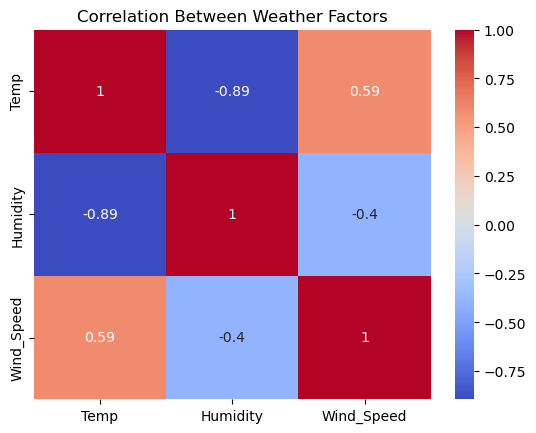

In [39]:
sns.heatmap(df[["Temp","Humidity","Wind_Speed"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Weather Factors")
plt.show()
#This is a correlation matrix shows how strongly how the weather variables(Temperature, Humidity, and Wind Speed) 
#are related to each other.

#The values in correlation matrix/Heatmap always range from -1 to 1
#The color represents the strength and direction of the relationship.
#Red color represent Strong positive correlation here means when one increase other also increases
#Dark Blue color represents Strong negative relationship means when one decreases other increases
#See here in the output as temperature increases, humidity tends to decrease as its value is -0.76
#Higher wind speed often comes with higher temperature because the value is +0.59

#So we can infer from this heatmap 
#When it’s hot, the humidity drops significantly
#When it’s windy, the temperature is often higher

In [40]:
df["Date"] = df["DateTime"].dt.date#Extracts the Date from Date Time column and create new Date column in the dataset
df["Month"] = df["DateTime"].dt.month_name()#Extracts the month from Date Time column and create new Month column in the dataset
df#Printing the dataset with new columns added

,DateTime,Temp,Temp_Min,Temp_Max,Humidity,Wind_Speed,Description,Date,Month
0,2025-11-12 23:30:00,16.99,16.99,16.99,43,1.95,clear sky,2025-11-12,November
1,2025-11-13 02:30:00,16.65,15.97,16.65,44,1.72,clear sky,2025-11-13,November
2,2025-11-13 05:30:00,15.72,15.08,15.72,47,2.03,clear sky,2025-11-13,November
3,2025-11-13 08:30:00,18.48,18.48,18.48,48,2.69,clear sky,2025-11-13,November
4,2025-11-13 11:30:00,24.34,24.34,24.34,34,4.34,clear sky,2025-11-13,November
5,2025-11-13 14:30:00,26.43,26.43,26.43,27,3.11,clear sky,2025-11-13,November
6,2025-11-13 17:30:00,22.98,22.98,22.98,37,1.84,clear sky,2025-11-13,November
7,2025-11-13 20:30:00,18.87,18.87,18.87,41,1.95,clear sky,2025-11-13,November
8,2025-11-13 23:30:00,17.27,17.27,17.27,49,1.89,clear sky,2025-11-13,November
9,2025-11-14 02:30:00,16.37,16.37,16.37,56,2.30,clear sky,2025-11-14,November


In [41]:
daily_summary = df.groupby("Date").agg({#Groups all weather readings by date.
    #Since our data has multiple records per day(every 3 hours) this combines all those into one day.
    #Applies aggregation functions (like mean, max, min) on each group.Here we have used only mean
    "Temp": "mean",#Average of all temperatures for that day
    "Humidity": "mean",#Average of all Humidity for that day
    "Wind_Speed": "mean"#Average of all Wind Speed for that day
}).reset_index()#Converts the grouped data back into a normal DataFrame so it’s easy to view

print(" Daily Weather Summary:")
daily_summary.head()


 Daily Weather Summary:


,Date,Temp,Humidity,Wind_Speed
0,2025-11-12,16.99000,43.000,1.95000
1,2025-11-13,20.09250,40.875,2.44625
2,2025-11-14,20.31375,48.000,2.65625
3,2025-11-15,20.36625,45.500,2.59500
4,2025-11-16,20.18875,46.000,2.76500


In [42]:
!pip install folium

In [43]:
import folium, requests, pandas as pd#Folium is a Python library that helps you create interactive maps just like Google Maps directly in Python .
#We used Folium to plot different cities (like Nashik, Mumbai, Pune) on a map and show their temperature, humidity, and wind speed visually.
from folium.plugins import HeatMap#This line imports the HeatMap feature from the Folium library.
#It allows you to create a heatmap — a special kind of map that uses colors to show how values (like temperature, pollution, or population) 
#vary across locations.

In [45]:
API_KEY = "e6d216bdd30fc098485b192c3e990f6a"
cities = ["Nashik","Mumbai","Pune"]#city names we want to plot on Map

rows = []#empty list to store the weather information of each city.
for c in cities:#visits each city in the cities list above
    r = requests.get("https://api.openweathermap.org/data/2.5/weather",
                     params={"q": c, "appid": API_KEY, "units":"metric"}).json()#Sends a request to OpenWeatherMap API to get current weather for city c.
    #params={...} safely attaches query parameters like:
    #"q": c → city name
    #"appid": API_KEY → your API key
    #"units": "metric" → temperature in °C
    #.json() converts the API’s response into a Python dictionary.
    if r.get("cod") == 200:#
        #Checks if the API response was successful (status code 200).
        #If yes → data is valid, so we can use it.
        #If not → the city might be misspelled or the API failed, so skip it.
        rows.append({"city": c,#For each successful city, a dictionary is added to the list rows containing latitude
                     #longitude,temperature,humidity and windspeed
                     "lat": r["coord"]["lat"],
                     "lon": r["coord"]["lon"],
                     "temp": r["main"]["temp"],
                     "humidity": r["main"]["humidity"],
                     "wind": r["wind"]["speed"]})
df_map = pd.DataFrame(rows); #Converts the list of dictionaries (rows) into a Pandas DataFrame.
df_map


,city,lat,lon,temp,humidity,wind
0,Nashik,19.9833,73.8000,17.39,41,1.86
1,Mumbai,19.0144,72.8479,27.99,42,4.12
2,Pune,18.5196,73.8553,21.16,70,1.42


In [46]:
m = folium.Map(location=[19.99,73.79], zoom_start=6)
#m = folium.Map(location=[19.99,73.79] creates a Map where Nashik is located on the Earth
#19.99 is latitude of Nashik and 73.79 is longitude of Nashik
#zoom_start=6 → controls how “zoomed in” the map will look.
#(Lower value = zoomed out; higher value = zoomed in.)
for _, x in df_map.iterrows():#Goes through each city row
    #x → represents one row (city) at a time.
    #_ → ignores the row index (since we don’t need it).
    folium.CircleMarker(#Adds a blue colored circle on that city name
        location=[x.lat, x.lon],#Places the blue colored at the particular city’s latitude and longitude
        radius=8,#Sets the size of the circle here its 8 and its unit is screen pixels
        #means when you will zoom the map the circle will not enlarge or when you zoom out the 
        #circle will not become small
        popup=f"{x.city}: {x.temp}°C | Hum {x.humidity}% | Wind {x.wind} m/s",# popup Shows weather details when clicked on that
        #city circle
        tooltip=x.city,#Shows city name when hovered
        fill=True#color the inside of the circle if we do not write this then only circle
        #with blue color on outlines will appear
    ).add_to(m)#This put the created circle on the map
m


In [47]:
m2 = folium.Map(location=[19.99,73.79], zoom_start=6)
HeatMap(df_map[["lat","lon","temp"]].values.tolist(), radius=25).add_to(m2)
#df_map[["lat", "lon", "temp"]]
#Selects 3 columns from your DataFrame: latitude, longitude, and temperature
#.values.tolist():-Converts that data into a list of lists (a format Folium understands) → looks like this:
#[[19.99, 73.79, 28.5], [19.07, 72.87, 31.2], [18.52, 73.85, 29.0]]
#Creates the heatmap using these points. The radius (25) controls how “spread out” each point’s color appears.
m2

#Blue color represents cooler region
#Green / Yellow represents moderate temperature
#Red represents hotter rregion

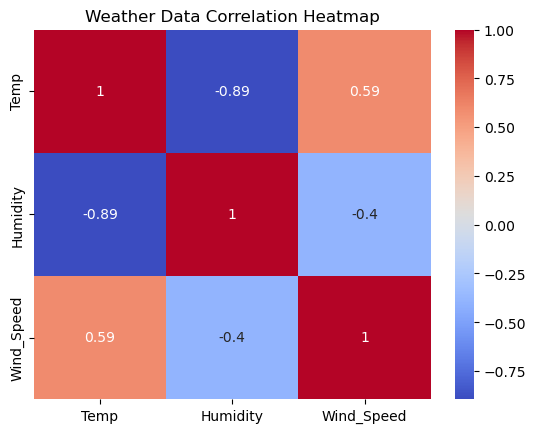

In [48]:
sns.heatmap(df[["Temp","Humidity","Wind_Speed"]].corr(), annot=True, cmap="coolwarm")
plt.title("Weather Data Correlation Heatmap")
plt.show()

In [49]:
m.save("maharashtra_weather_markers.html")#saving the first map in html format
m2.save("maharashtra_weather_heatmap.html")#saving second map in html format
print("Saved HTML files.")

Saved HTML files.
